In [10]:
import os
import ccxt
from dotenv import load_dotenv
import pandas as pd
from datetime import datetime
load_dotenv()

True

In [2]:
API_KEY = os.getenv('BITGET_API_KEY')
SECRET_KEY = os.getenv('BITGET_SECRET_KEY')
PASSWORD = os.getenv('BITGET_PASSWORD')

# Initialize the Bitget exchange
bitget = ccxt.bitget({
    'apiKey': API_KEY,
    'secret': SECRET_KEY,
    'password': PASSWORD,
})

In [11]:
path = "/home/ubuntu/project/finance/cex-market-analysis/src/data/binance/1h/BTC_USDT_1h.csv"
df = pd.read_csv(path)
df

date      open      high       low     close  \
0      2019-01-01 00:00:00   3701.23   3713.00   3689.88   3700.31   
1      2019-01-01 01:00:00   3700.20   3702.73   3684.22   3689.69   
2      2019-01-01 02:00:00   3689.67   3695.95   3675.04   3690.00   
3      2019-01-01 03:00:00   3690.00   3699.77   3685.78   3693.13   
4      2019-01-01 04:00:00   3692.32   3720.00   3685.94   3692.71   
...                    ...       ...       ...       ...       ...   
52561  2025-01-01 13:00:00  93820.75  94058.79  93600.28  94031.76   
52562  2025-01-01 14:00:00  94031.77  94450.85  93671.48  94175.89   
52563  2025-01-01 15:00:00  94175.89  94500.00  93900.00  94432.94   
52564  2025-01-01 16:00:00  94432.94  94492.00  93922.00  94090.49   
52565  2025-01-01 17:00:00  94090.50  94131.66  93760.93  93973.11   

            volume  
0       686.367420  
1       613.539115  
2       895.302181  
3       796.714818  
4      1317.452909  
...            ...  
52561   340.363870  
52562   751.906970  
52563   486.083950  
52564   580.273840  
52565   183.533110  

[52566 rows x 6 columns]

In [12]:
df['upper_wick'] = df['high'] - df[['open', 'close']].max(axis=1)
df.head()

date     open     high      low    close       volume  \
0  2019-01-01 00:00:00  3701.23  3713.00  3689.88  3700.31   686.367420   
1  2019-01-01 01:00:00  3700.20  3702.73  3684.22  3689.69   613.539115   
2  2019-01-01 02:00:00  3689.67  3695.95  3675.04  3690.00   895.302181   
3  2019-01-01 03:00:00  3690.00  3699.77  3685.78  3693.13   796.714818   
4  2019-01-01 04:00:00  3692.32  3720.00  3685.94  3692.71  1317.452909   

   upper_wick  
0       11.77  
1        2.53  
2        5.95  
3        6.64  
4       27.29

In [13]:
# Count the days where the wick is greater than zero
days_with_positive_wick = df[df['upper_wick'] > 0].shape[0]

print(f"Number of days with a wick greater than zero: {days_with_positive_wick}")

Number of days with a wick greater than zero: 51686


In [14]:
df['upper_wick_pct'] = ((df['high'] - df['close']) / df['close']) * 100

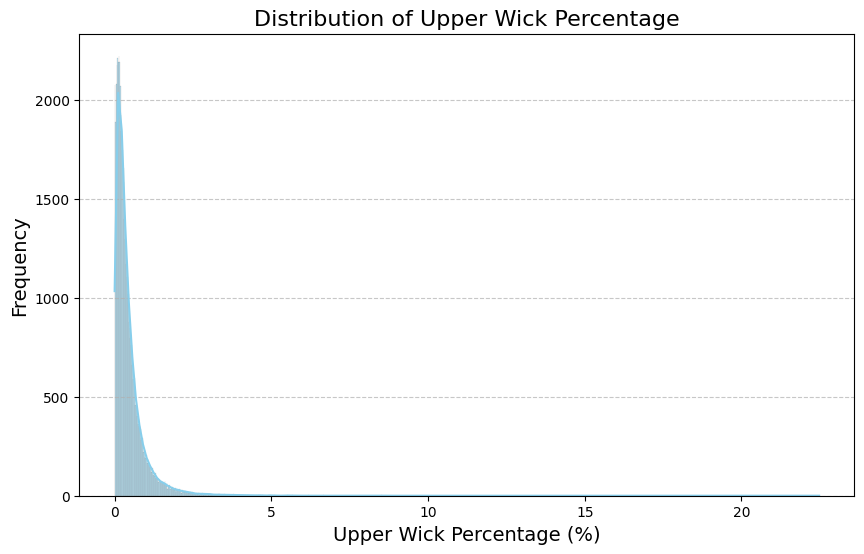

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distribution of upper_wick_pct
plt.figure(figsize=(10, 6))
sns.histplot(df['upper_wick_pct'], kde=True, color='skyblue')
plt.title('Distribution of Upper Wick Percentage', fontsize=16)
plt.xlabel('Upper Wick Percentage (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
df['upper_wick'][df['close'] <  df['open']]

0         11.77
1          2.53
9         15.02
11         9.15
13        39.94
          ...  
52556     71.91
52557     57.82
52558    123.68
52564     59.06
52565     41.16
Name: upper_wick, Length: 25751, dtype: float64

In [17]:
import plotly.graph_objects as go
# Create a candlestick chart using Plotly
fig = go.Figure(data=[go.Candlestick(
    x=df['date'],
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    increasing_line_color='green',  # Green for price increase
    decreasing_line_color='red',    # Red for price decrease
)])
# Customize layout
fig.update_layout(
    title='Candlestick Chart of Price',
    xaxis_title='Date',
    yaxis_title='Price (USDT)',
    template='plotly_dark',  # Set a dark theme for the plot
    xaxis_rangeslider_visible=False  # Optionally hide the range slider
)

# Show the plot
fig.show()